In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import Tracking_Py
import random

In [3]:
with h5py.File("F:/PhD_Franziska/Headon/memGFP/memGFP_control/memGFP_control_PIV.h5", "r") as file:
    
    U = file["U"][:]
    V = file["V"][:]
    M = file["M"][:]
    xgrid = file["xgrid"][:]
    ygrid = file["ygrid"][:]

# Tracking with whole image (1) -- Cutting aggregates -- Running out of vector field region error. 
Cutting the aggregates out from the whole image and do pseudo tracking.

In [8]:
np.shape(U)

(48, 32, 32)

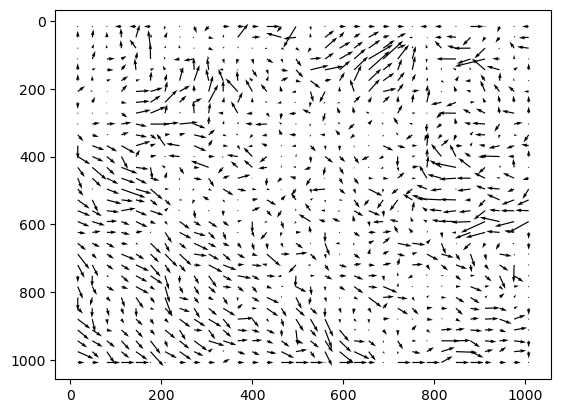

In [9]:
plt.quiver(xgrid[0], ygrid[0], V[0], -U[0])
plt.gca().invert_yaxis()

# Tracking with the whole image (2) -- Directly with the whole image. 

Has the advantage that the tracks are not in one limited region of aggregates/vector fields. Allow more complete tracking and therefore less error with tracks (especially long tracks)

In [4]:
# Giving start points, time intervals.
# start_x_array = [[200], [200], [300], [300], [400], [400], 
#                  [100], [100], [200], [200], [300], [300],
#                 [400], [500], [400], [500], 
#                 [700], [700], [600], [800]]
# start_y_array = [[300], [500], [300], [500], [300], [500], 
#                  [800], [1000], [800], [1000], [800], [1000],
#                 [600], [850], [600], [850],
#                 [700], [900], [800], [800]]

start_x_array = [[random.randint(0,1000)] for i in range(500)]
start_y_array = [[random.randint(0,1000)] for i in range(500)]

t_array = [[0, 40]]*len(start_x_array)

whole_img_x, whole_img_y = Tracking_Py.pseudo_tracking_piv_grid_v2(U, V, t_array,
                                                                  start_x_array,
                                                                  start_y_array)

IndexError: index 60 is out of bounds for axis 0 with size 32

In [ ]:
plt.figure(figsize=(5,5), dpi=200)
plt.quiver(xgrid[80], ygrid[80], V[80], -U[80])
#plt.quiver(agg1_xgrid, agg1_ygrid, agg1_V[100], -agg1_U[100])
for i in range(len(start_x_array)): 
    # plt.scatter(whole_img_x[i], whole_img_y[i], color = "royalblue", s=1, alpha=0.5)
    plt.scatter(start_x_array[i], start_y_array[i], color = "orange", s=4)
    plt.plot(whole_img_x[i], whole_img_y[i], color = "royalblue", alpha=0.5)
plt.gca().invert_yaxis()
plt.show()

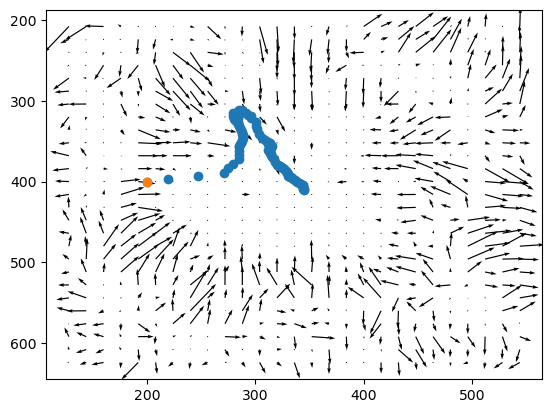

In [16]:
# Single pseudo track. 

agg1_pseudo_x, agg1_pseudo_y = Tracking_Py.pseudo_tracking_piv_grid_single_v2(U,
                                                                             V, 
                                                                             [0, 100],
                                                                             [200],
                                                                             [400])
plt.quiver(agg1_xgrid, agg1_ygrid, agg1_V[100], -agg1_U[100])
plt.scatter(agg1_pseudo_x, agg1_pseudo_y)
plt.scatter([200], [400])
# plt.xlim(100,600)
# plt.ylim(100,600)
plt.gca().invert_yaxis()